# Churn Prediction - A classificaiton task

Using various customer data predicts if telecomunicaiton customers will stop using our services; predict if they will churn.

We will use the dataset shared on this Kaggle.com page: https://www.kaggle.com/royjafari/customer-churn

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
import pydotplus 

In [2]:
customer_df  = pd.read_csv('Customer Churn.csv')
customer_df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


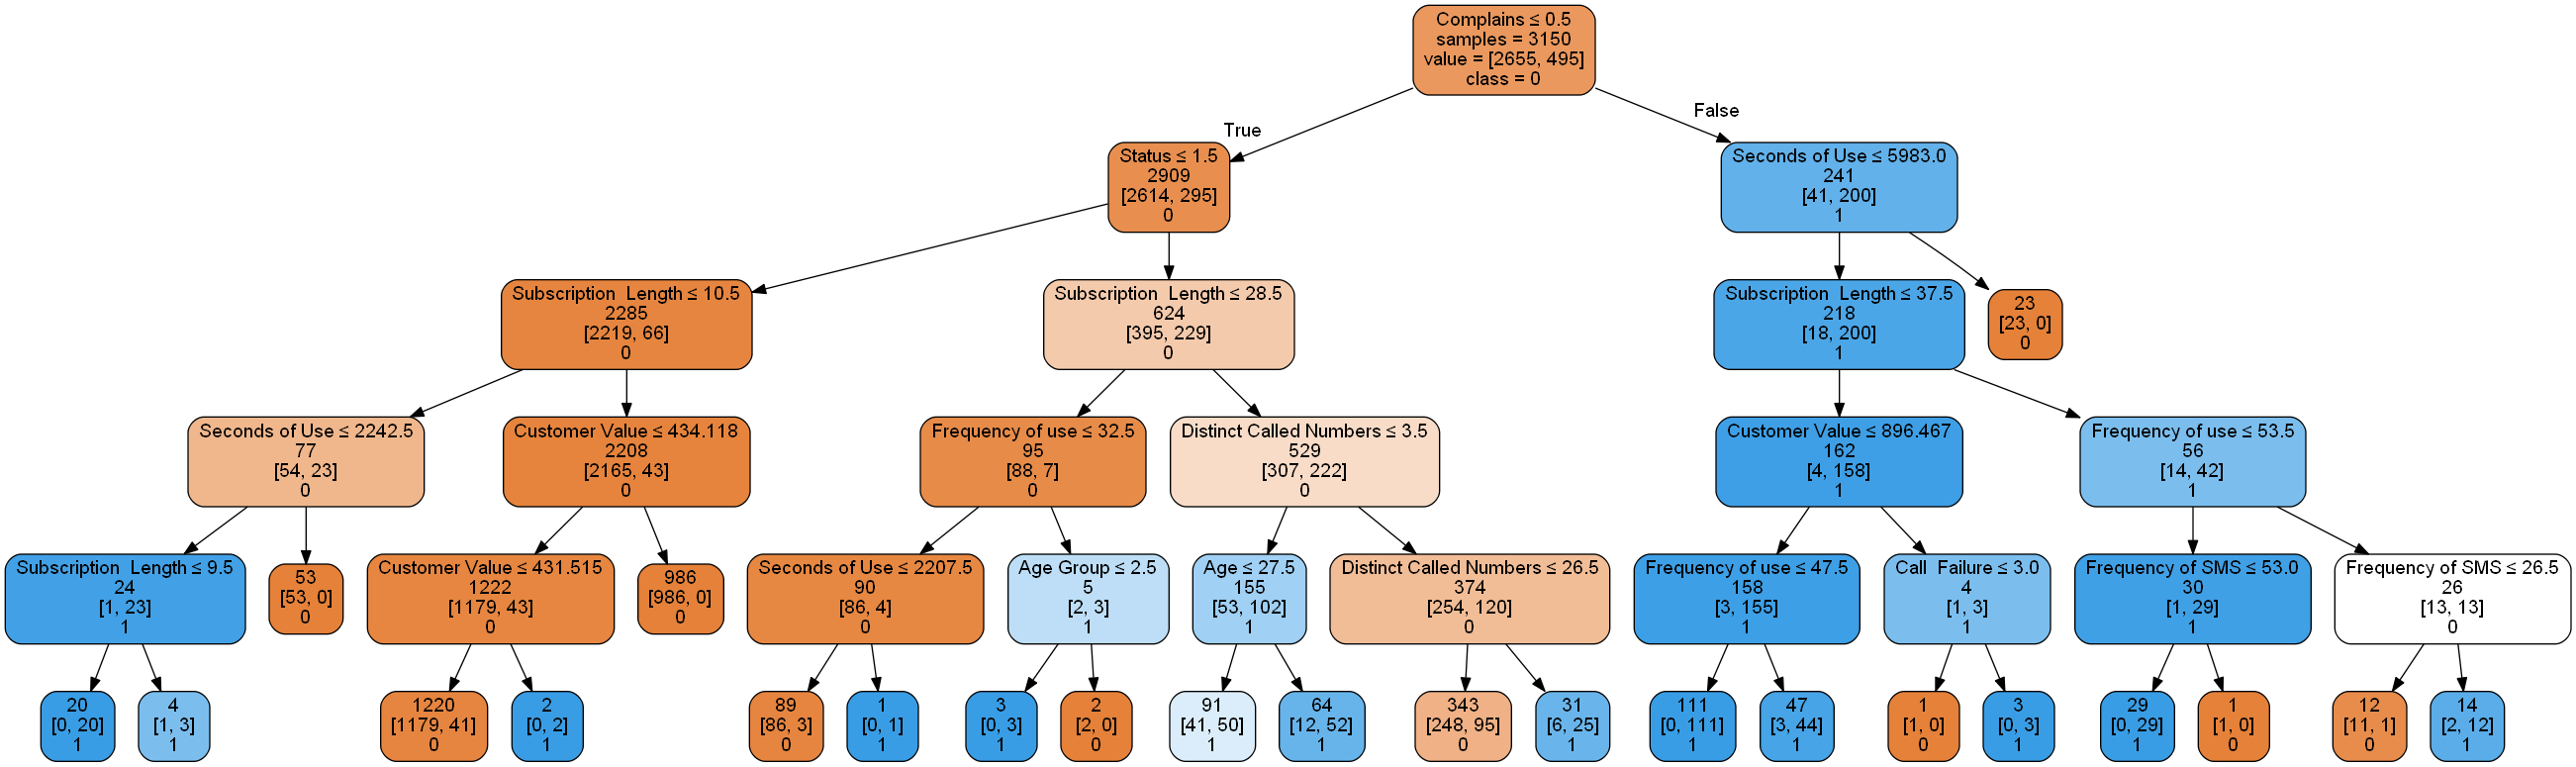

In [4]:
Xtrain = customer_df.drop(columns=['Churn'])
ytrain = customer_df['Churn'] 

classTree = DecisionTreeClassifier(max_depth=5)
classTree.fit(Xtrain, ytrain)

plotDecisionTree(classTree, feature_names=customer_df.columns[0:-1], class_names=classTree.classes_)

In [5]:
new_customer_dic = {'Call  Failure':3, 'Complains': 0, 'Subscription  Length':31,
                    'Charge  Amount':0, 'Seconds of Use': 6458, 'Frequency of use': 65,
                    'Frequency of SMS': 93, 'Distinct Called Numbers': 31, 'Age Group': 2,
                    'Tariff Plan': 1, 'Status': 1, 'Age':25, 'Customer Value': 712.035}
new_customer = pd.DataFrame(new_customer_dic,index=[3150])
new_customer

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
3150,3,0,31,0,6458,65,93,31,2,1,1,25,712.035


In [6]:
classTree.predict(new_customer)

array([0], dtype=int64)

# Method 1 Statistical

In [7]:
import statsmodels.api as sm 

log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.221403
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3150
Model:                          Logit   Df Residuals:                     3137
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                  0.4909
Time:                        17:13:45   Log-Likelihood:                -697.42
converged:                       True   LL-Null:                       -1369.9
Covariance Type:            nonrobust   LLR p-value:                9.779e-281
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Call  Failure               0.1273      0.018      7.239      0.000       0.093       0.162
Complains                   4.1713      0.297     14.054      0.000       3.590       4.753
Subscription  Length       -0.0338      0.009     -3.608      0.000      -0.052      -0.015
Charge  Amount             -0.3777      0.118     -3.188      0.001      -0.610      -0.146
Seconds of Use              0.0001      0.000      0.974      0.330      -0.000       0.000
Frequency of use           -0.0524      0.008     -6.212      0.000      -0.069      -0.036
Frequency of SMS           -0.0356      0.012     -2.879      0.004      -0.060      -0.011
Distinct Called Numbers    -0.0146      0.010     -1.514      0.130      -0.034       0.004
Age Group                   0.1034      0.283      0.365      0.715      -0.452       0.659
Tariff Plan                -1.5058      0.480     -3.139      0.002      -2.446      -0.566
Status                      1.2377      0.194      6.367      0.000       0.857       1.619
Age                        -0.0131      0.030     -0.437      0.662      -0.072       0.046
Customer Value              0.0060      0.003      2.046      0.041       0.000       0.012
===========================================================================================
"""

We don't have enough statistical evidence to reject the null hypothesis that the following attributes are not related churn:

    - Seconds of Use
    - Distinct Called Numbers
    - Age Group
    - Age   

# Method 2 | Corealtion Aanalysis

In [8]:
Corelations = Xtrain.corr()
Corelations

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298


In [9]:
BM = (Corelations > 0.7) | (Corelations < -0.7) 
Corelations[BM]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
Call Failure,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complains,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscription Length,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charge Amount,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seconds of Use,NaN,NaN,NaN,NaN,1.000000,0.946489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency of use,NaN,NaN,NaN,NaN,0.946489,1.000000,NaN,0.736114,NaN,NaN,NaN,NaN,NaN
Frequency of SMS,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.924877
Distinct Called Numbers,NaN,NaN,NaN,NaN,NaN,0.736114,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Age Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.960758,NaN
Tariff Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The corelation analysis tells us the followings:

    - we should use either Seconds of Use or Frequency of use
    - we should use either Distinct Called Numbers or Frequency of use
    - we should use either Frequency of SMS or Customer Value
    - we should use either Age or Age Group

# Method 3 Decision Tree

# Method 4 - Random Forest

                    feature  importance       std
9               Tariff Plan    0.001076  0.002844
3            Charge  Amount    0.015225  0.016878
11                      Age    0.027843  0.014844
8                 Age Group    0.029128  0.015260
6          Frequency of SMS    0.051310  0.024386
0             Call  Failure    0.062676  0.023617
7   Distinct Called Numbers    0.074929  0.032054
12           Customer Value    0.081469  0.045491
5          Frequency of use    0.107722  0.048792
2      Subscription  Length    0.116502  0.026585
10                   Status    0.116747  0.084139
4            Seconds of Use    0.124753  0.051858
1                 Complains    0.190621  0.080982


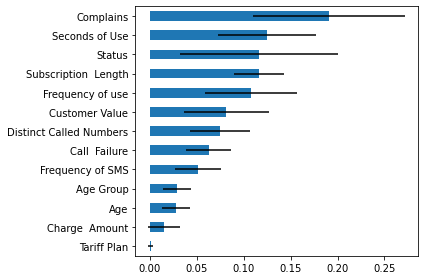

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(Xtrain, ytrain)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': Xtrain.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()